<a href="https://colab.research.google.com/github/sanchi191/limb-detection-framework/blob/main/minor_project_human_activities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dog_walking.jpg to dog_walking.jpg


In [ ]:
model = VGG16(weights = 'imagenet', include_top=False)

img_path = 'dog_walking.jpg'
img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
x = preprocess_input(x)
features = model.predict(x)
print(features)


[[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    1.9016981e+01 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    5.6767650e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    5.6046300e+00 0.0000000e+00]]

  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    6.3099771e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3474880e+00
    6.5377015e-01 1.9483310e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 5.5378727e+01]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e

In [ ]:
features.shape
df = pd.Dataframe()
df['cnn feature'] = features
df['label'] = os.lisdir(path)[1]

(1, 14, 14, 512)
(1, 2)
                                         cnn feature        label
0  [[[[0.00000000e+00 0.00000000e+00 0.00000000e+...  Walking_Dog


In [ ]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
model = VGG16()
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filter,biases = layer.get_weights()
  print(layer.name,filter.shape)


553476096/553467096 [==============================] - 3s 0us/step
block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


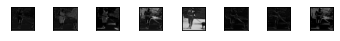

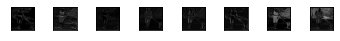

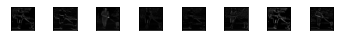

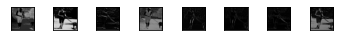

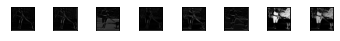

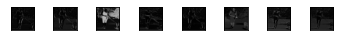

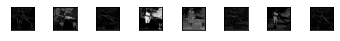

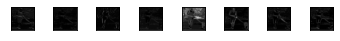

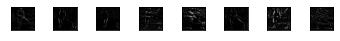

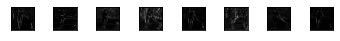

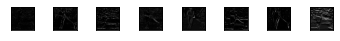

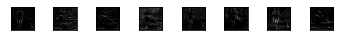

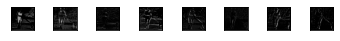

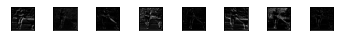

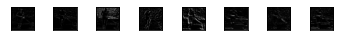

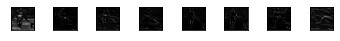

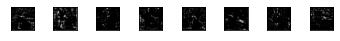

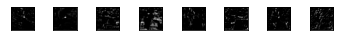

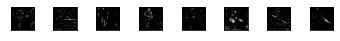

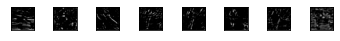

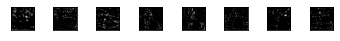

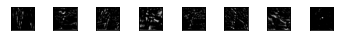

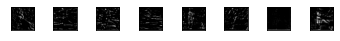

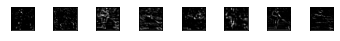

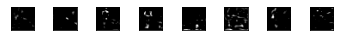

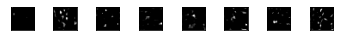

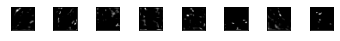

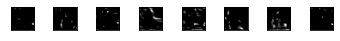

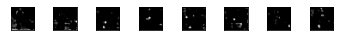

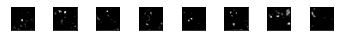

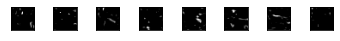

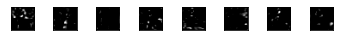

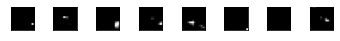

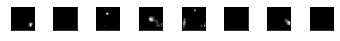

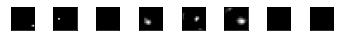

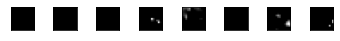

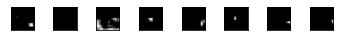

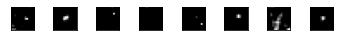

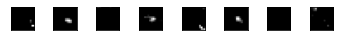

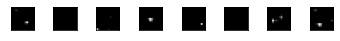

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

model = VGG16()
ixs = [2,5,9,13,17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs = model.inputs,outputs= outputs)
img = load_img('dog_walking.jpg', target_size = (224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
feature_maps = model.predict(img)
square = 8
for fmap in feature_maps:
  ix =1
  for _ in range(square):
    for _ in range(square):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])

      pyplot.imshow(fmap[0, :, :, ix-1], cmap = 'gray')
      ix+=1
    pyplot.show()



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def extraction_in_VGG16(img):
  model = VGG16(weights = 'imagenet', include_top=False)
  img1 = image.load_img(img,target_size=(224,224))
  x = image.img_to_array(img1)
  x = np.expand_dims(x,axis = 0)
  x = preprocess_input(x)
  features = model.predict(x)
  return features
def extract_feature(img):
    features = []
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True)
    features.append(fd)
    features = np.array(features)
    return features


In [ ]:
import os,csv
import numpy as np
import cv2
import pandas as pd
from skimage.feature import hog
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
buep = ['VGG16']
label = []
images = ['HOG']
path = '/content/gdrive/My Drive/activities/data'
for folder_person in os.listdir(path):
    for activity in os.listdir(path + '/' +folder_person):
       img_path = path + '/' +folder_person + '/' +activity
       w = extraction_in_VGG16(img_path)
       llp = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
       images.append(llp)
       buep.append(w)
       label.append(folder_person)
np.savetxt("label.csv", label, delimiter ="", fmt ='% s')
file = open('images.csv', 'w+', newline ='')
with file:
    write = csv.writer(file)
    write.writerows(buep)
file.close()


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
import torch.nn as nn
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt

dir = '../Users/dell/PycharmProjects/pythonProject/PycharmProjects/pythonProject/'
folders = os.listdir(dir)
folder_person = [dir + '/' + folder for folder in folders][0]
folder_activity = [folder_person + "/" + activity for activity in os.listdir(folder_person)]
activities = [activity for activity in os.listdir(folder_person)]
all_images = []
for i in range(len(folder_activity)):
    all_images.append(os.listdir(folder_activity[i])[0])

images = []
for i in range(len(folder_activity)):
    images.append(folder_activity[i] + "/" + all_images[i])

images = np.array([cv2.imread(image, cv2.IMREAD_GRAYSCALE) for image in images])
names = [name for name in activities]
plot_portraits(images, names, 256, 256, n_row=2, n_col=5)
alexnet = models.alexnet(pretrained=True)
alexnet.classifier = nn.Sequential(*[alexnet.classifier[i] for i in range(5)])

def prepare_data(path):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    i=1
    for folder_person in os.listdir(path):
        for folder_activity in os.listdir(path + folder_person):
            for file in os.listdir(path + folder_person + "/" + folder_activity)[0:30]:
                image = Image.open(os.path.join(path + folder_person + "/" + activity, file))
                if(i<5):
                    image_with_features = extract_Features(image)
                    X_train.append(image_with_features)
                    y_train.append(int(folder_activity[0:2]))
                    i+=1
                else:
                    image_with_features = extractFeatures(image)
                    X_test.append(image_with_features)
                    y_test.append(int(folder_activity[0:2]))
                    i=1
    return X_train, y_train, X_test, y_test
def model_building(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    return score
DATASET_PATH = '../Users/dell/PycharmProjects/pythonProject/PycharmProjects/pythonProject/'
X_train, y_train, X_test, y_test = prepare_data(DATASET_PATH)
def train_2d_cnn():
    x = x_input = layers.Input(shape=(128, 128, 3))

    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.BatchNormalization()(x) # size: 64x64

    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)  # size: 64x64

    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.BatchNormalization()(x)  # size: 32x32

    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.BatchNormalization()(x)  # size: 16x16

    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.BatchNormalization()(x) # size: 8x8x

    x_prob = layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid', name='x_prob')(x)
    x_boxes = layers.Conv2D(4, kernel_size=3, padding='same', name='x_boxes')(x)
    x_cls = layers.Conv2D(10, kernel_size=3, padding='same', activation='sigmoid', name='x_cls')(x)

    # ---

    gate = tf.where(x_prob > 0.5, tf.ones_like(x_prob), tf.zeros_like(x_prob))
    x_boxes = x_boxes * gate
    x_cls = x_cls * gate

    # ---

    x = layers.Concatenate()([x_prob, x_boxes, x_cls])

    model = tf.keras.models.Model(x_input, x)
    summary = model.summary()
    return summary
def gate():
    gate = tf.where(x_prob > 0.5, tf.ones_like(x_prob), tf.zeros_like(x_prob))
    x_boxes = x_boxes * gate
    x_cls = x_cls * gate
    return c_cls
#This code will output zero and stop gradient of low probability area.

#Then combine the outputs and the model.

x = layers.Concatenate()([x_prob, x_boxes, x_cls])
model = tf.keras.models.Model(x_input, x)
model.summary()
idx_p = [0]
idx_bb = [1, 2, 3, 4]
idx_cls = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


@tf.function
def loss_bb(y_true, y_pred):
    y_true = tf.gather(y_true, idx_bb, axis=-1)
    y_pred = tf.gather(y_pred, idx_bb, axis=-1)

    loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
    return tf.reduce_mean(loss[loss > 0.0])


@tf.function
def loss_p(y_true, y_pred):
    y_true = tf.gather(y_true, idx_p, axis=-1)
    y_pred = tf.gather(y_pred, idx_p, axis=-1)

    loss = tf.losses.binary_crossentropy(y_true, y_pred)
    return tf.reduce_sum(loss)


@tf.function
def loss_cls(y_true, y_pred):
    y_true = tf.gather(y_true, idx_cls, axis=-1)
    y_pred = tf.gather(y_pred, idx_cls, axis=-1)

    loss = tf.losses.binary_crossentropy(y_true, y_pred)
    return tf.reduce_sum(loss)


@tf.function
def loss_func(y_true, y_pred):
    return loss_bb(y_true, y_pred) + loss_p(y_true, y_pred) + loss_cls(y_true, y_pred)


opt = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss=loss_func, optimizer=opt)
batch_size = 32
X_train, y_train = make_data(size=batch_size * 400)
#And training for 30 epochs

model.fit(X_train, y_train, batch_size=batch_size, epochs=30, shuffle=True)
# finally printing the accuracy of the models
models = [(LinearSVC(), "Linear Support Vector"),

          (train_2d_cnn(), "2D CNN")]

for model in models:
    score = model_building(model[0], X_train, X_test, y_train, y_test)
    print("{} score: {}".format(model[1],score))



2D CNN score: 0.9066666666666666 Linear Support Vector score: 0.805
2D CNN score: 0.9066666666666666 Linear Support Vector score: 0.805
